In [157]:
# WeatherPy
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 
# To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.
# Your objective is to build a series of scatter plots to showcase the following relationships:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

In [158]:
# Import Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
from citipy import citipy
import random
import owmkeys

In [159]:
# Randomly select at least 500 unique **(non-repeat)** cities based on latitude and longitude.


#lat = random.sample(range(-91, 91), 100) # Change Ranges to 500 or over later
#lon = random.sample(range(-181, 181), 100)

lat = np.random.randint(-90, 90, size=2500)
lon = np.random.randint(-180, 180, size=2500)

#print(lat)
#print(lon)

zip_coords = zip(lat, lon)
rand_coords = list(zip(lat, lon))
# print(rand_coords)

coords_df = pd.DataFrame((rand_coords), columns=["Latitude", "Longitude"])

# Add Columns to Capture Place Data

coords_df["Closest City"] = ""
coords_df["Country Code"] = ""

coords_df.head()

,Latitude,Longitude,Closest City,Country Code
0,-62,70,,
1,72,117,,
2,-22,-98,,
3,78,-168,,
4,88,-132,,


In [160]:
# Iterate & Store City/Country Data

for index,row in coords_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    coords_df.set_value(index,"Closest City",city.city_name)
    coords_df.set_value(index,"Country Code",city.country_code)
    
coords_df.head()

,Latitude,Longitude,Closest City,Country Code
0,-62,70,saint-philippe,re
1,72,117,saskylakh,ru
2,-22,-98,puerto ayora,ec
3,78,-168,lavrentiya,ru
4,88,-132,tuktoyaktuk,ca


In [171]:
# Check For Duplicates - We have city names & country so can lose random lat/lon numbers

cities_df = coords_df.drop(coords_df.columns[[0, 1]], axis=1) 
#df.drop(df.columns[[0, 1, 3]], axis=1) 

cities_list = cities_df.drop_duplicates()
cities_list.shape
#cities_list = cities_list.sample(20)

(849, 2)

In [172]:
# Connect to Weather API

base_url = "http://api.openweathermap.org/data/2.5/weather"

params = {'appid': owmkey,
          'q': '',
          'units': 'imperial',
          'mode': 'json'}


In [173]:
# Create cols to hold needed values

cities_list.loc[:,"Latitude"] = ""
cities_list.loc[:,"Longitude"] = "" # might as well
cities_list.loc[:,"Temperature"] = ""
cities_list.loc[:,"Humidity"] = ""
cities_list.loc[:,"Cloudiness"] = ""
cities_list.loc[:,"Wind Speed"] = ""
#cities_list

/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [174]:
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number, city name, and requested URL.
counter = 0

for index,row in cities_list.iterrows():
    counter += 1
    params["q"] =f'{row["Closest City"]},{row["Country Code"]}'
    city_weather_resp = req.get(base_url, params=params).json()
    print(f"Getting Record {counter}")
    print(f"Processing weather information for {params['q']}")
   # print(f'{params}')
   # Add new Lat/Lon/Temp/Wind/Humidity/Clouds to Cities DF
    cities_list.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    cities_list.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    cities_list.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    cities_list.set_value(index,"Wind Speed",city_weather_resp.get("wind",{}).get("speed"))
    cities_list.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    cities_list.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))

Getting Record 1
Processing weather information for saint-philippe,re
Getting Record 2
Processing weather information for saskylakh,ru
Getting Record 3
Processing weather information for puerto ayora,ec
Getting Record 4
Processing weather information for lavrentiya,ru
Getting Record 5
Processing weather information for tuktoyaktuk,ca
Getting Record 6
Processing weather information for illoqqortoormiut,gl
Getting Record 7
Processing weather information for milkovo,ru
Getting Record 8
Processing weather information for busselton,au
Getting Record 9
Processing weather information for hovd,mn
Getting Record 10
Processing weather information for ust-barguzin,ru
Getting Record 11
Processing weather information for arraial do cabo,br
Getting Record 12
Processing weather information for morant bay,jm
Getting Record 13
Processing weather information for pandan,ph
Getting Record 14
Processing weather information for ushuaia,ar
Getting Record 15
Processing weather information for punta arenas,cl


Getting Record 127
Processing weather information for angoche,mz
Getting Record 128
Processing weather information for kasempa,zm
Getting Record 129
Processing weather information for iquique,cl
Getting Record 130
Processing weather information for shizunai,jp
Getting Record 131
Processing weather information for scarborough,gb
Getting Record 132
Processing weather information for norman wells,ca
Getting Record 133
Processing weather information for karachi,pk
Getting Record 134
Processing weather information for aksarka,ru
Getting Record 135
Processing weather information for geraldton,au
Getting Record 136
Processing weather information for salalah,om
Getting Record 137
Processing weather information for torbay,ca
Getting Record 138
Processing weather information for najran,sa
Getting Record 139
Processing weather information for sisimiut,gl
Getting Record 140
Processing weather information for severo-kurilsk,ru
Getting Record 141
Processing weather information for hithadhoo,mv
Getti

Getting Record 251
Processing weather information for olafsvik,is
Getting Record 252
Processing weather information for cidreira,br
Getting Record 253
Processing weather information for amderma,ru
Getting Record 254
Processing weather information for hearst,ca
Getting Record 255
Processing weather information for taltal,cl
Getting Record 256
Processing weather information for halalo,wf
Getting Record 257
Processing weather information for novikovo,ru
Getting Record 258
Processing weather information for faanui,pf
Getting Record 259
Processing weather information for tabuk,sa
Getting Record 260
Processing weather information for rio gallegos,ar
Getting Record 261
Processing weather information for matay,eg
Getting Record 262
Processing weather information for manadhoo,mv
Getting Record 263
Processing weather information for qasigiannguit,gl
Getting Record 264
Processing weather information for la palma,pa
Getting Record 265
Processing weather information for mokobeng,bw
Getting Record 2

Getting Record 375
Processing weather information for qaqortoq,gl
Getting Record 376
Processing weather information for wamba,cd
Getting Record 377
Processing weather information for uhlove,ua
Getting Record 378
Processing weather information for hornepayne,ca
Getting Record 379
Processing weather information for marsh harbour,bs
Getting Record 380
Processing weather information for svetlaya,ru
Getting Record 381
Processing weather information for iqaluit,ca
Getting Record 382
Processing weather information for lasa,cn
Getting Record 383
Processing weather information for tupancireta,br
Getting Record 384
Processing weather information for naze,jp
Getting Record 385
Processing weather information for port macquarie,au
Getting Record 386
Processing weather information for resen,mk
Getting Record 387
Processing weather information for colares,pt
Getting Record 388
Processing weather information for hambantota,lk
Getting Record 389
Processing weather information for flin flon,ca
Getting R

Getting Record 498
Processing weather information for celestun,mx
Getting Record 499
Processing weather information for skjervoy,no
Getting Record 500
Processing weather information for thinadhoo,mv
Getting Record 501
Processing weather information for nouadhibou,mr
Getting Record 502
Processing weather information for nazare,br
Getting Record 503
Processing weather information for sukabumi,id
Getting Record 504
Processing weather information for kautokeino,no
Getting Record 505
Processing weather information for baisha,cn
Getting Record 506
Processing weather information for port hedland,au
Getting Record 507
Processing weather information for bhikangaon,in
Getting Record 508
Processing weather information for isabela,us
Getting Record 509
Processing weather information for george,za
Getting Record 510
Processing weather information for gumdag,tm
Getting Record 511
Processing weather information for zyryanka,ru
Getting Record 512
Processing weather information for shambu,et
Getting Re

Getting Record 622
Processing weather information for pleshanovo,ru
Getting Record 623
Processing weather information for port-cartier,ca
Getting Record 624
Processing weather information for rabo de peixe,pt
Getting Record 625
Processing weather information for kudahuvadhoo,mv
Getting Record 626
Processing weather information for awjilah,ly
Getting Record 627
Processing weather information for two rivers,us
Getting Record 628
Processing weather information for lubaczow,pl
Getting Record 629
Processing weather information for volovo,ru
Getting Record 630
Processing weather information for sidi ali,dz
Getting Record 631
Processing weather information for natchitoches,us
Getting Record 632
Processing weather information for porto novo,cv
Getting Record 633
Processing weather information for nalut,ly
Getting Record 634
Processing weather information for caohai,cn
Getting Record 635
Processing weather information for shorapani,ge
Getting Record 636
Processing weather information for simao,

Getting Record 746
Processing weather information for karkaralinsk,kz
Getting Record 747
Processing weather information for tobolsk,ru
Getting Record 748
Processing weather information for elizabeth city,us
Getting Record 749
Processing weather information for arlit,ne
Getting Record 750
Processing weather information for kurchum,kz
Getting Record 751
Processing weather information for gonbad-e qabus,ir
Getting Record 752
Processing weather information for orda,ru
Getting Record 753
Processing weather information for enshi,cn
Getting Record 754
Processing weather information for tazmalt,dz
Getting Record 755
Processing weather information for machala,ec
Getting Record 756
Processing weather information for blackfoot,us
Getting Record 757
Processing weather information for siedlce,pl
Getting Record 758
Processing weather information for warqla,dz
Getting Record 759
Processing weather information for merauke,id
Getting Record 760
Processing weather information for sosnogorsk,ru
Getting R

In [175]:
# Drop cities with missing information
cities_list = cities_list.dropna()
cities_list = cities_list.sample(500)
cities_list.shape
#cities_list.head()

(500, 8)

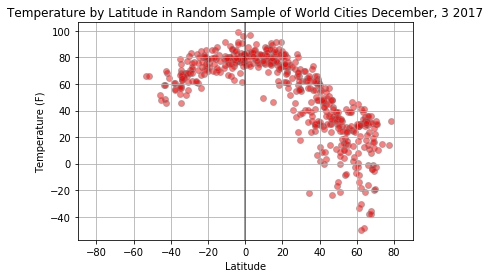

In [176]:
# Build a scatter plot for each data type
# You must use proper labeling of your plots, including aspects like:
# Plot Titles (with date of analysis) and Axes Labels.

# Scatterplot Temperature (F) vs. Latitude

plt.scatter(cities_list["Latitude"], cities_list["Temperature"], marker="o",
            Facecolors="Red", Edgecolors="Gray", alpha=.5)

# Incorporate the other graph properties
plt.title("Temperature by Latitude in Random Sample of World Cities December, 3 2017")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim( -90, 90)
plt.axvline(0, color='black',alpha=0.5)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

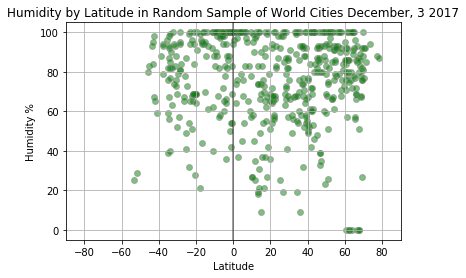

In [177]:
# Scatterplot Humidity (%) vs. Latitude

plt.scatter(cities_list["Latitude"], cities_list["Humidity"], marker="o",
            Facecolors="Green", Edgecolors="Gray", alpha=.5)

# Incorporate the other graph properties
plt.title("Humidity by Latitude in Random Sample of World Cities December, 3 2017")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim( -90, 90)
plt.axvline(0, color='black',alpha=0.5)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

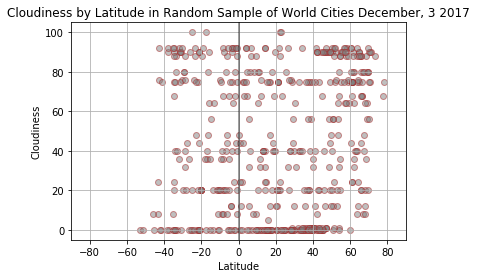

In [178]:
# Scatterplot Cloudiness (%) vs. Latitude

plt.scatter(cities_list["Latitude"], cities_list["Cloudiness"], marker="o",
            Facecolors="Gray", Edgecolors="Brown", alpha=.5)

# Incorporate the other graph properties
plt.title("Cloudiness by Latitude in Random Sample of World Cities December, 3 2017")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim( -90, 90)
plt.axvline(0, color='black',alpha=0.5)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

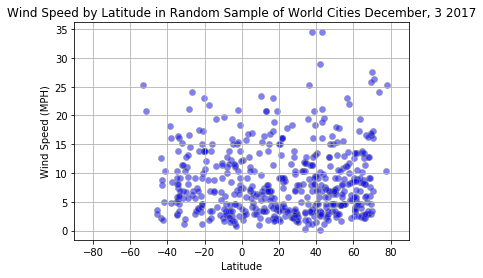

In [179]:
# Scatterplot Wind Speed (mph) vs. Latitude

plt.scatter(cities_list["Latitude"], cities_list["Wind Speed"], marker="o",
            Facecolors="Blue", Edgecolors="Gray", alpha=.5)

# Incorporate the other graph properties
plt.title("Wind Speed by Latitude in Random Sample of World Cities December, 3 2017")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim( -90, 90)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [183]:
# written description of three observable trends based on the data.

# 1. Temperatures do indeed get higher as you approach the equator
# as seen in arc from highest recorded temperatures peak at lower latitudes.
# The highest temps, those greater than 60, are between the 40th parallels.

# 2. The majority of wind speeds are less the 15 MPH and are distrubuted evenly across measured cities.

# 3. There is no readily conclusive pattern to cloudiness across measured cities other
# than they tend to cluster toward the edges. Most are in the upper or lower quartiles.

In [184]:
# Save both a CSV of all data retrieved and png images for each scatter plot.

cities_list.to_csv("City_Weather_Sample_Data.csv")

In [185]:
# You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.